# K Nearest Neighbors
The following knn model is implemented under file `knn.py`. The MNIST dataset is used to train and validate the model

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
from knn import KNN
from scipy.stats import mode
np.random.seed(42)

/anaconda3/envs/ml-with-np/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [3]:
mnist = sklearn.datasets.load_digits()
X = mnist['data']
y = mnist['target']
print(f'X shape {X.shape}')
print(f'y shape {y.shape}')

X shape (1797, 64)
y shape (1797,)


In [4]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [7]:
X[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

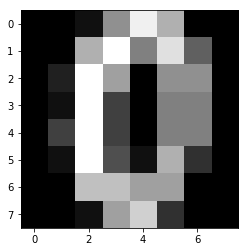

In [13]:
plt.imshow(X[10].reshape(8,8), cmap='gray')

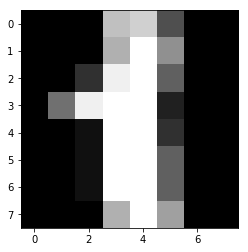

In [14]:
plt.imshow(X[1].reshape(8,8), cmap='gray')

In [10]:
np.sqrt(((X[0]-X[1])**2).sum())

59.55669567731239

In [12]:
np.sqrt(((X[0]-X[10])**2).sum())

23.706539182259394

#### Split dataset into train and validation set

In [16]:
# subset 1000 as train, 200 as valid
rnd_idx = np.random.permutation(X.shape[0])
trn_idx = rnd_idx[:1000]
val_idx = rnd_idx[1000:1200]

In [17]:
X_trn, y_trn = X[trn_idx], y[trn_idx]
X_val, y_val = X[val_idx], y[val_idx]
print(f'train shape {X_trn.shape}')
print(f'valid shape {X_val.shape}')

train shape (1000, 64)
valid shape (200, 64)


Build and train knn model

In [18]:
knn = KNN()
knn.fit(X_trn, y_trn)
y_pred = knn.predict(X_val, k=1)
print(f'k=1 accuracy {np.sum(y_pred==y_val)/y_pred.shape[0]}')
y_pred = knn.predict(X_val, k=10)
print(f'k=10 accuracy {np.sum(y_pred==y_val)/y_pred.shape[0]}')

k=1 accuracy 0.975
k=10 accuracy 0.98


#### Validate different k values
The following graph shows the accuracy level using different k neighbors. Many k-values (2, 7-11, and etc...) seem to give best results.

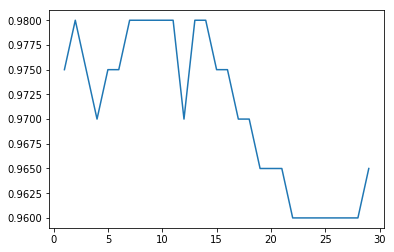

In [8]:
val_preds = [np.sum(y_val==knn.predict(X_val, k=k)) / X_val.shape[0] for k in range(1,30)]
plt.plot(np.arange(1,30), val_preds);

#### Test set

In [9]:
tst_idx = rnd_idx[1200:]
X_tst, y_tst = X[tst_idx], y[tst_idx]
tst_pred = knn.predict(X_tst, k=10)

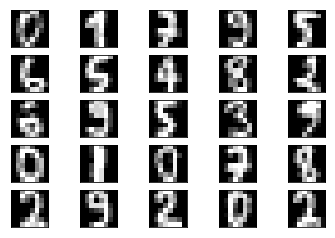

In [10]:
fig, axes = plt.subplots(5, 5)
for i, ax in enumerate(axes.flat):
    ax.imshow(X_tst[i].reshape(8, 8), cmap='gray')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

In [11]:
print(f"pred \n {tst_pred[:25].reshape(5, 5)}")
print(f"actual \n {y_tst[:25].reshape(5, 5)}\n")
print('k=10 accuracy', np.sum(tst_pred==y_tst)/y_tst.shape[0])

pred 
 [[0 1 7 9 5]
 [6 5 4 8 2]
 [6 9 5 3 9]
 [0 1 0 7 2]
 [2 9 2 0 2]]
actual 
 [[0 1 7 9 5]
 [6 5 4 8 2]
 [6 9 5 3 9]
 [0 1 0 7 8]
 [2 9 2 0 2]]

k=10 accuracy 0.9698492462311558
